<a href="https://colab.research.google.com/github/ombhosale9172/Heart-Stroke-Prediction/blob/master/Stock_price_hybrid_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import json
import os

username = "YOUR_KAGGLE_USERNAME"
key = "YOUR_KAGGLE_KEY"   # Kaggle API token

os.makedirs("/root/.kaggle", exist_ok=True)

with open("/root/.kaggle/kaggle.json", "w") as f:
    json.dump({"username": username, "key": key}, f)

!chmod 600 /root/.kaggle/kaggle.json

In [2]:
!pip install kaggle

In [3]:
# https://www.kaggle.com/datasets/equinxx/stock-tweets-for-sentiment-analysis-and-prediction
!kaggle datasets download -d equinxx/stock-tweets-for-sentiment-analysis-and-prediction

Dataset URL: https://www.kaggle.com/datasets/equinxx/stock-tweets-for-sentiment-analysis-and-prediction
License(s): CC0-1.0
  0% 0.00/6.59M [00:00<?, ?B/s]
100% 6.59M/6.59M [00:00<00:00, 520MB/s]


In [4]:
!kaggle datasets download -d jacksoncrow/stock-market-dataset

Dataset URL: https://www.kaggle.com/datasets/jacksoncrow/stock-market-dataset
License(s): CC0-1.0
 74% 384M/522M [00:02<00:01, 112MB/s]
100% 522M/522M [00:02<00:00, 202MB/s]


In [5]:
!unzip stock-tweets-for-sentiment-analysis-and-prediction.zip

Archive:  stock-tweets-for-sentiment-analysis-and-prediction.zip
  inflating: stock_tweets.csv        
  inflating: stock_yfinance_data.csv  


In [6]:
!unzip /content/stock-market-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: stocks/CAPE.csv         
  inflating: stocks/CAPL.csv         
  inflating: stocks/CAPR.csv         
  inflating: stocks/CAR.csv          
  inflating: stocks/CARA.csv         
  inflating: stocks/CARE.csv         
  inflating: stocks/CARG.csv         
  inflating: stocks/CARO.csv         
  inflating: stocks/CARR#.csv        
  inflating: stocks/CARS.csv         
  inflating: stocks/CARV.csv         
  inflating: stocks/CASA.csv         
  inflating: stocks/CASH.csv         
  inflating: stocks/CASI.csv         
  inflating: stocks/CASS.csv         
  inflating: stocks/CASY.csv         
  inflating: stocks/CAT.csv          
  inflating: stocks/CATB.csv         
  inflating: stocks/CATC.csv         
  inflating: stocks/CATM.csv         
  inflating: stocks/CATO.csv         
  inflating: stocks/CATS.csv         
  inflating: stocks/CATY.csv         
  inflating: stocks/CB.csv           
  inflating: stocks/CBAN.csv         

In [7]:
import pandas as pd
df = pd.read_csv("/content/stock_yfinance_data.csv")

In [8]:
df_sentiment = pd.read_csv('stock_tweets.csv')
display(df_sentiment.head())

,Date,Tweet,Stock Name,Company Name
0,2022-09-29 23:41:16+00:00,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc."
1,2022-09-29 23:24:43+00:00,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc."
2,2022-09-29 23:18:08+00:00,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc."
3,2022-09-29 22:40:07+00:00,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,TSLA,"Tesla, Inc."
4,2022-09-29 22:27:05+00:00,"@RealDanODowd @Tesla Stop trying to kill kids,...",TSLA,"Tesla, Inc."


In [9]:
#  showing top 5 rows of stock dataset
df.head()
df

,Date,Open,High,Low,Close,Adj Close,Volume,Stock Name
0,2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000,TSLA
1,2021-10-01,259.466675,260.260010,254.529999,258.406677,258.406677,51094200,TSLA
2,2021-10-04,265.500000,268.989990,258.706665,260.510010,260.510010,91449900,TSLA
3,2021-10-05,261.600006,265.769989,258.066681,260.196655,260.196655,55297800,TSLA
4,2021-10-06,258.733337,262.220001,257.739990,260.916656,260.916656,43898400,TSLA
...,...,...,...,...,...,...,...,...
6295,2022-09-23,13.090000,13.892000,12.860000,13.710000,13.710000,28279600,XPEV
6296,2022-09-26,14.280000,14.830000,14.070000,14.370000,14.370000,27891300,XPEV
6297,2022-09-27,14.580000,14.800000,13.580000,13.710000,13.710000,21160800,XPEV
6298,2022-09-28,13.050000,13.421000,12.690000,13.330000,13.330000,31799400,XPEV


In [10]:
#dataset information
df_sentiment.info()

#describe
print(df_sentiment.describe())

#duplicates
df_sentiment.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80793 entries, 0 to 80792
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Date          80793 non-null  object
 1   Tweet         80793 non-null  object
 2   Stock Name    80793 non-null  object
 3   Company Name  80793 non-null  object
dtypes: object(4)
memory usage: 2.5+ MB
                             Date                         Tweet Stock Name  \
count                       80793                         80793      80793   
unique                      64424                         64479         25   
top     2022-04-15 14:15:26+00:00  $TSLA will triple in 2022 🚀🌕       TSLA   
freq                           14                            25      37422   

       Company Name  
count         80793  
unique           25  
top     Tesla, Inc.  
freq          37422  


np.int64(0)

In [11]:
#shape of dataset
rows = df_sentiment.shape[0]
print(f'total number of rows:{rows}')
col =df_sentiment.shape[1]
print(f'total number of columns:{col}')

total number of rows:80793
total number of columns:4


In [12]:

#missing value in sentiment dataset
missing_value  = df_sentiment.isnull().sum()
if missing_value.sum() > 1:
     print('missing values are present in dataset')
else:
     print('no missing values present in dataset')

no missing values present in dataset


In [13]:
stock_name= 'AMZN'
df_sentiment = df_sentiment[df_sentiment['Stock Name'] == stock_name]
print(df.shape)

(6300, 8)


In [14]:
!pip install emoji
import nltk
import re
import emoji
nltk.download('stopwords')
from nltk.corpus import stopwords

stop = stopwords.words('english')

def clean_text(text):

    text = str(text).lower()
    # 1. Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)

    # 2. Remove HTML
    text = re.sub(r'<.*?>', '', text)

    # 3. Remove Mentions
    text = re.sub(r'@\w+', '', text)

    # 4. Remove Hashtag sign
    text = re.sub(r'#', '', text)

    # 5. Remove emojis
    text = emoji.demojize(text)

    # 6. Remove numbers & special chars
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)

    # 7. Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()

    return text

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 608.4/608.4 kB 38.4 MB/s eta 0:00:00


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [15]:
df_sentiment['Tweet'] =df_sentiment['Tweet'].apply(clean_text)

In [16]:
!pip install vaderSentiment

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 11.0 MB/s eta 0:00:00


In [17]:
analyzer = SentimentIntensityAnalyzer()

def get_vader_score(text):
    return analyzer.polarity_scores(text)['compound']

df_sentiment['sentiment'] = df_sentiment['Tweet'].apply(get_vader_score)
df_sentiment.head()

,Date,Tweet,Stock Name,Company Name,sentiment
48351,2022-09-29 22:40:47+00:00,a group of lawmakers led by sen elizabeth warr...,AMZN,"Amazon.com, Inc.",0.1027
48352,2022-09-29 22:23:54+00:00,nio just because i m down money doesn t mean t...,AMZN,"Amazon.com, Inc.",0.2500
48353,2022-09-29 18:34:51+00:00,today s drop in spx is a perfect example of wh...,AMZN,"Amazon.com, Inc.",-0.6197
48354,2022-09-29 15:57:59+00:00,druckenmiller owned cvna this year munger boug...,AMZN,"Amazon.com, Inc.",0.2382
48355,2022-09-29 15:10:30+00:00,top qqq holdings and credit rating aapl aaa ms...,AMZN,"Amazon.com, Inc.",0.7783


In [18]:

def result(Score):
     if Score>0.05:
          return 1
     elif Score<-0.05:
          return -1
     else:
          return  0
df_sentiment['score'] = df_sentiment['sentiment'].apply(result)

In [19]:
df_sentiment[['sentiment','score']].head()

,sentiment,score
48351,0.1027,1
48352,0.2500,1
48353,-0.6197,-1
48354,0.2382,1
48355,0.7783,1


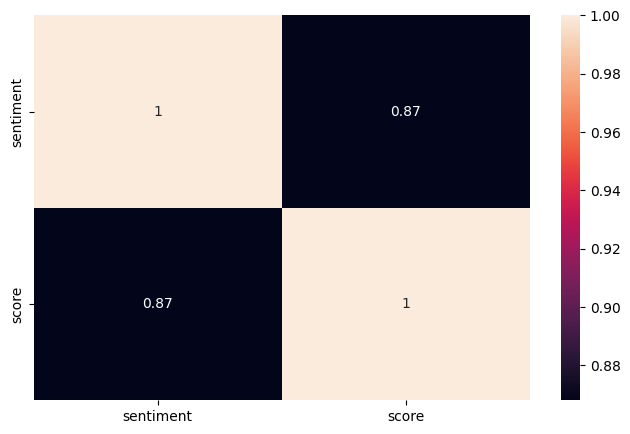

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
#heatmap
numeric_col = df_sentiment.select_dtypes(include = ['int64','float64'])
plt.figure(figsize = (8,5))
corr = numeric_col.corr(numeric_only = True)
sns.heatmap(corr,annot = True)
plt.show()

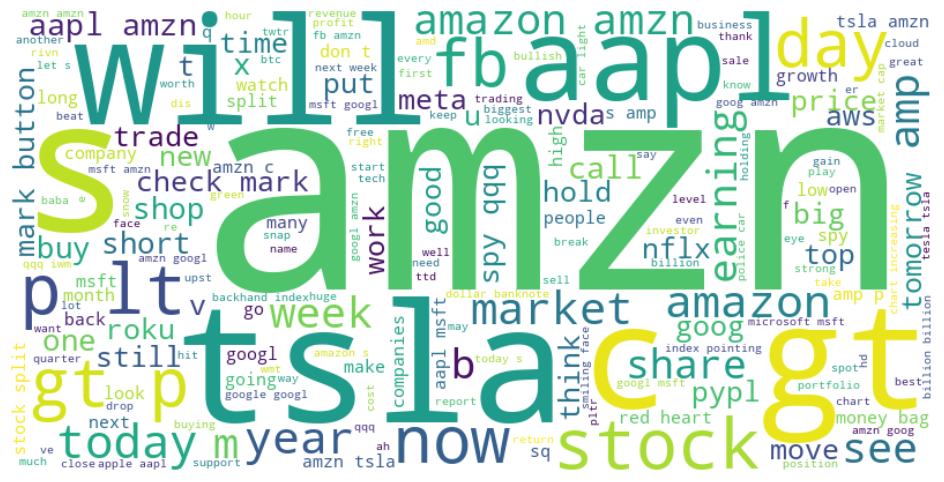

In [21]:
!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(width=800, height=400, background_color='white').generate(" ".join(df_sentiment['Tweet']))

plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [22]:
df_sentiment['Date'] = pd.to_datetime(df_sentiment['Date'])

In [23]:
columns_to_drop = ['Stock Name', 'Company Name']
existing_columns = [col for col in columns_to_drop if col in df_sentiment.columns]

if existing_columns:
    df_sentiment = df_sentiment.drop(columns=existing_columns)
else:
    print(f"Columns {columns_to_drop} already dropped or do not exist.")

In [24]:
df_sentiment.head(3)

,Date,Tweet,sentiment,score
48351,2022-09-29 22:40:47+00:00,a group of lawmakers led by sen elizabeth warr...,0.1027,1
48352,2022-09-29 22:23:54+00:00,nio just because i m down money doesn t mean t...,0.2500,1
48353,2022-09-29 18:34:51+00:00,today s drop in spx is a perfect example of wh...,-0.6197,-1


In [25]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Stock Name'],
      dtype='object')

In [26]:
df['Date'] = pd.to_datetime(df['Date']).dt.date

In [27]:
#information of stock price dataset
df.info()
# data description
print(df.describe())
#  duplicates present in dataset
df.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6300 entries, 0 to 6299
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        6300 non-null   object 
 1   Open        6300 non-null   float64
 2   High        6300 non-null   float64
 3   Low         6300 non-null   float64
 4   Close       6300 non-null   float64
 5   Adj Close   6300 non-null   float64
 6   Volume      6300 non-null   int64  
 7   Stock Name  6300 non-null   object 
dtypes: float64(5), int64(1), object(2)
memory usage: 393.9+ KB
              Open         High          Low        Close    Adj Close  \
count  6300.000000  6300.000000  6300.000000  6300.000000  6300.000000   
mean    174.748195   177.594589   171.734715   174.657624   173.756012   
std     134.989675   136.795419   133.049955   134.949601   134.582934   
min      11.050000    11.210000    10.610000    11.060000    10.837500   
25%      78.170002    79.891003    76.792501    78

np.int64(0)

In [28]:
# missing values
missing_value = df.isnull().sum()
if missing_value.sum()>1:
     print("missing values are present")
else:
     print("missing values are not present")

missing values are not present


In [29]:
numeric_col = df.select_dtypes(include = ['float64','int64'])
print(numeric_col.head())

         Open        High         Low       Close   Adj Close    Volume
0  260.333344  263.043335  258.333344  258.493347  258.493347  53868000
1  259.466675  260.260010  254.529999  258.406677  258.406677  51094200
2  265.500000  268.989990  258.706665  260.510010  260.510010  91449900
3  261.600006  265.769989  258.066681  260.196655  260.196655  55297800
4  258.733337  262.220001  257.739990  260.916656  260.916656  43898400


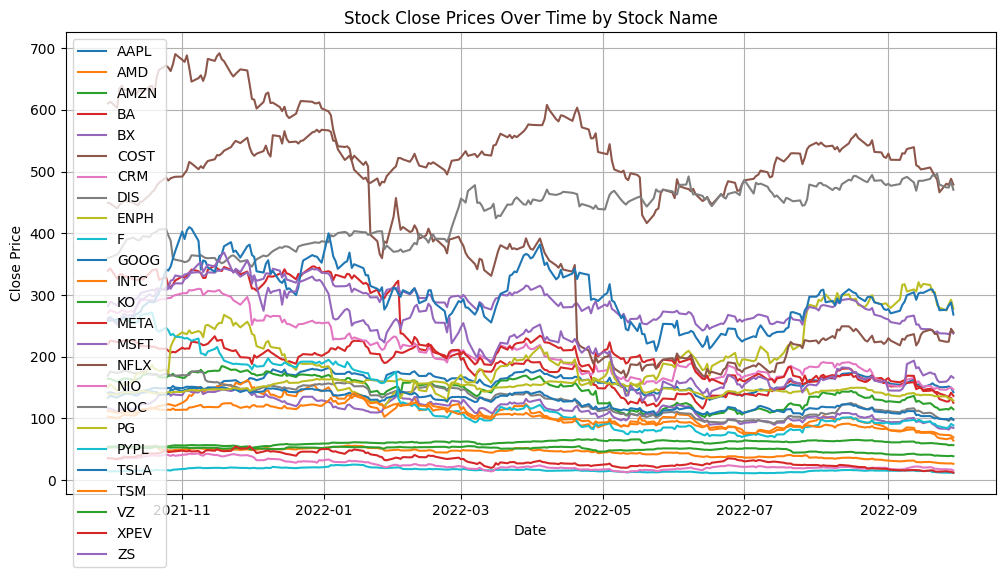

In [30]:
plt.figure(figsize=(12, 6))
for stock_name, group in df.groupby('Stock Name'):
    plt.plot(group['Date'], group['Close'], label=stock_name)

plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Stock Close Prices Over Time by Stock Name')
plt.legend()
plt.grid(True)
plt.show()

In [31]:

stock_name = 'AMZN'
df = df[df['Stock Name'] == stock_name]

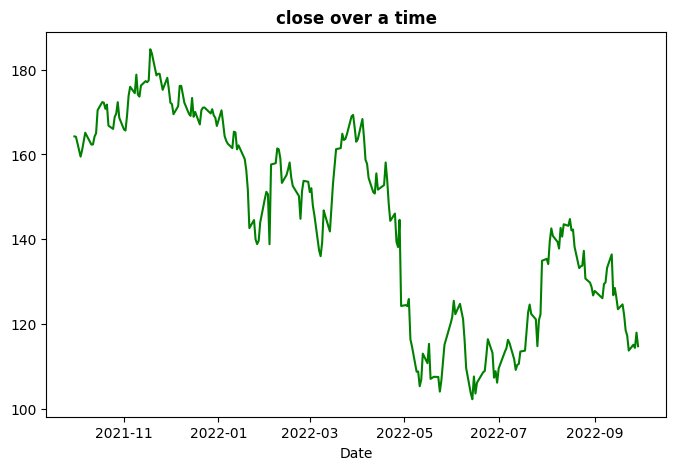

In [32]:
plt.figure(figsize = (8,5))
plt.plot(df['Date'],df['Close'],color = 'green')
plt.xlabel('Date')
plt.title("close over a time", weight= 'bold')
plt.show()

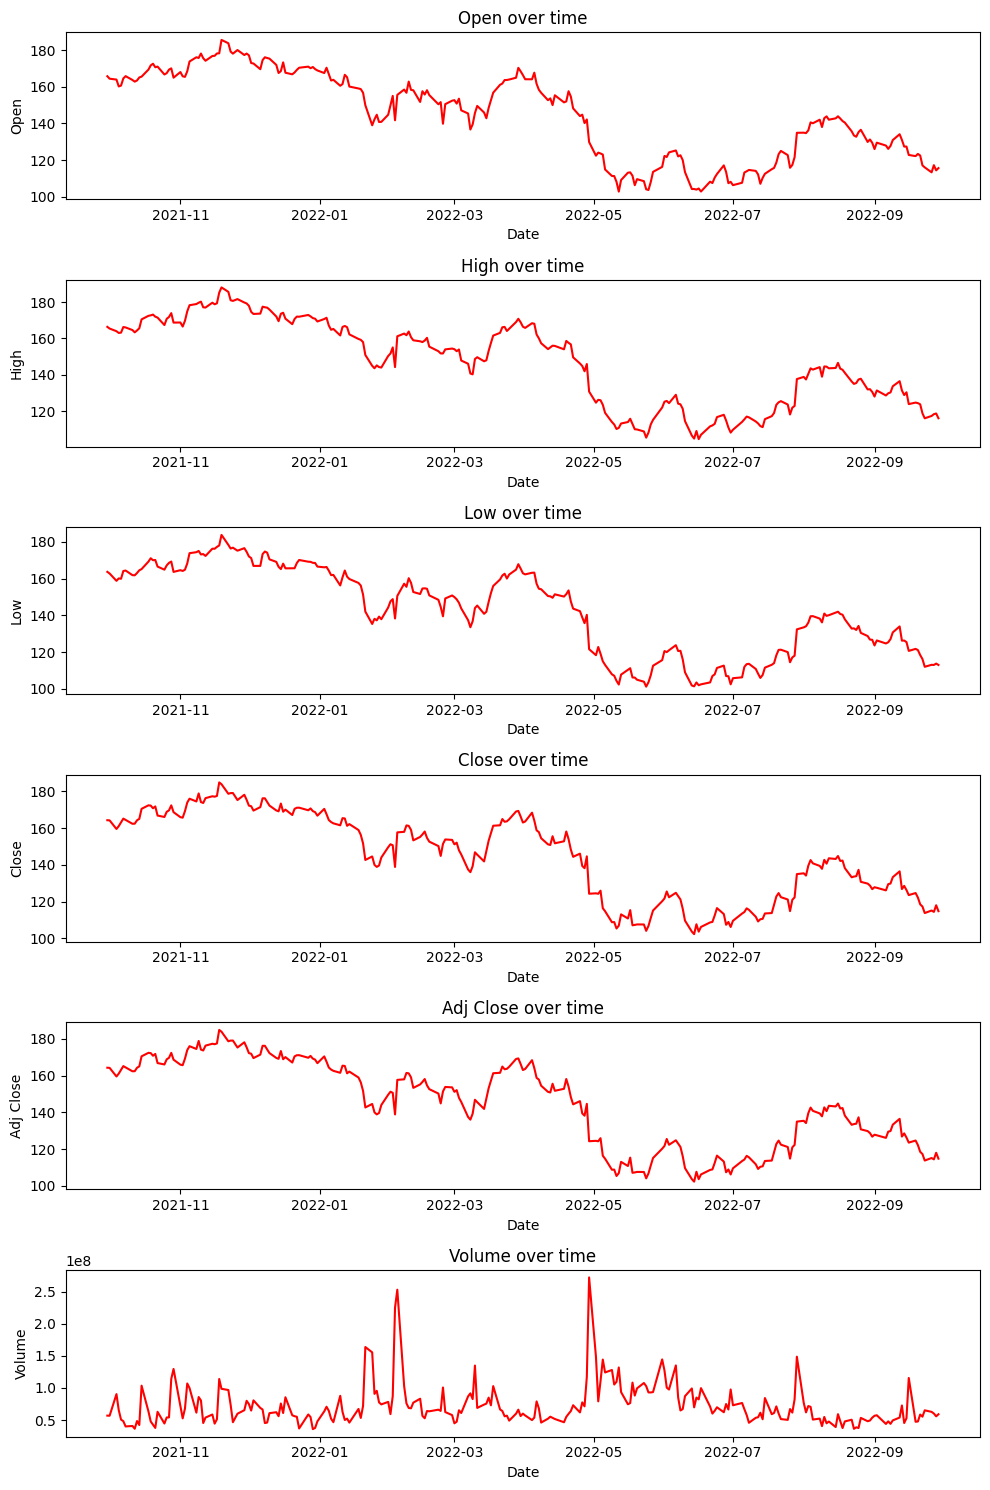

In [33]:
plt.figure(figsize=(10, 15))
for idx, col in enumerate(numeric_col.columns):
     plt.subplot(len(numeric_col.columns), 1, idx + 1)
     plt.plot(df['Date'], df[col], color='red')
     plt.title(f'{col} over time')
     plt.xlabel('Date')
     plt.ylabel(col)
plt.tight_layout()
plt.show()

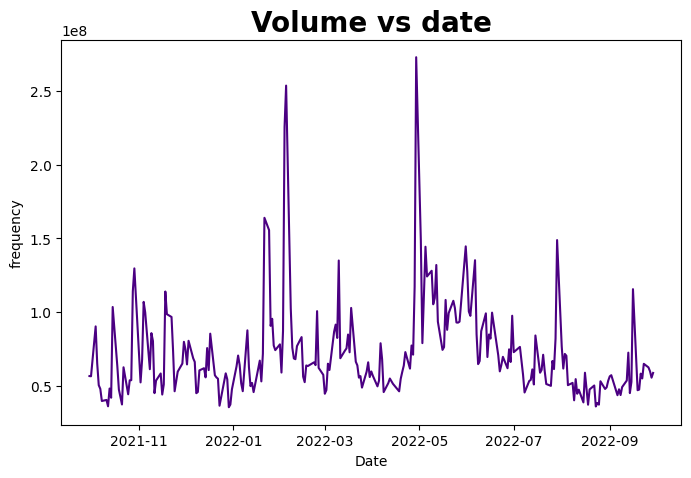

In [34]:

plt.figure(figsize = (8,5))
plt.plot(df['Date'],df['Volume'],color = 'indigo')
plt.xlabel('Date')
plt.ylabel('frequency')
plt.title('Volume vs date',fontsize =20, weight= 'bold')
plt.show()

In [35]:
df_sentiment['Date'] = pd.to_datetime(df_sentiment['Date'])
df_sentiment['Date'] = df_sentiment['Date'].dt.date
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].dt.date

/tmp/ipython-input-3594893180.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])
/tmp/ipython-input-3594893180.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].dt.date


In [36]:
new_df = df.merge(df_sentiment,how = 'inner',on = 'Date')

In [37]:
new_df

,Date,Open,High,Low,Close,Adj Close,Volume,Stock Name,Tweet,sentiment,score
0,2021-09-30,165.800003,166.392502,163.699493,164.251999,164.251999,56848000,AMZN,my top holdings make up of my portfolio as of ...,0.4404,1
1,2021-09-30,165.800003,166.392502,163.699493,164.251999,164.251999,56848000,AMZN,amazon amzn has x the market cap of alibaba ba...,-0.5106,-1
2,2021-09-30,165.800003,166.392502,163.699493,164.251999,164.251999,56848000,AMZN,returns over the last years bitcoin btc tesla ...,-0.2263,-1
3,2021-09-30,165.800003,166.392502,163.699493,164.251999,164.251999,56848000,AMZN,great snapshot of what it looks like when an i...,0.9369,1
4,2021-09-30,165.800003,166.392502,163.699493,164.251999,164.251999,56848000,AMZN,shopify is now of us e commerce it really was ...,0.5809,1
...,...,...,...,...,...,...,...,...,...,...,...
3335,2022-09-29,115.599998,116.070000,113.059998,114.800003,114.800003,58969700,AMZN,wage inflation up arrow profit margin down arr...,0.4404,1
3336,2022-09-29,115.599998,116.070000,113.059998,114.800003,114.800003,58969700,AMZN,amazon to loan over m to small businesses over...,0.1779,1
3337,2022-09-29,115.599998,116.070000,113.059998,114.800003,114.800003,58969700,AMZN,stocks i think entering intriguing levels to a...,-0.3612,-1
3338,2022-09-29,115.599998,116.070000,113.059998,114.800003,114.800003,58969700,AMZN,spouting whale news boe buys bonds saves pensi...,-0.8750,-1


In [38]:

dropping_col = new_df[['Tweet','Stock Name','Date']]
for col in dropping_col.columns:
     new_df = new_df.drop(columns = col)

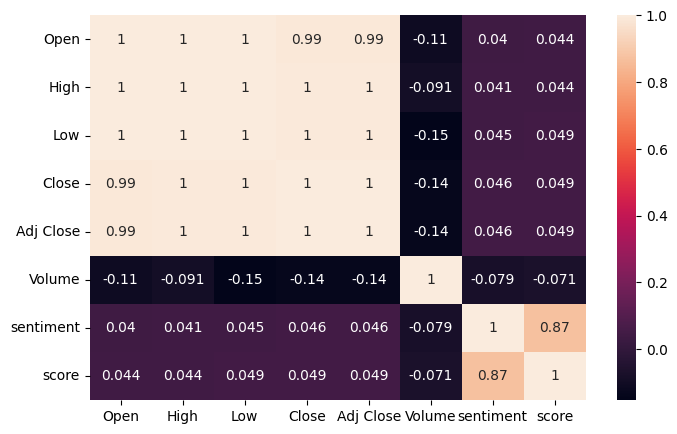

In [39]:
#heatmap
plt.figure(figsize=(8,5))
corr = new_df.corr(numeric_only = True)
sns.heatmap(corr,annot = True)
plt.show()

In [40]:

#Using minmaxscaler
from sklearn.preprocessing import MinMaxScaler
scaler_close = MinMaxScaler(feature_range = (0,1))
scaler_feature = MinMaxScaler(feature_range = (0,1))

In [41]:
new_df['Close'] = scaler_close.fit_transform(new_df[['Close']])

In [42]:
new_df['sentiment'] = scaler_feature.fit_transform(new_df[['sentiment']])

In [43]:

import numpy as np
scaled_data = np.concatenate((new_df[['Close']].values,new_df[['sentiment']]), axis=1)

In [44]:
training_data_len = int(len(scaled_data) * 0.8)
train_data = scaled_data[:training_data_len]
test_data  = scaled_data[training_data_len:]
# Create Sliding Window Sequences
lookback = 60

# TRAIN
X_train = []
y_train = []

for i in range(lookback, len(train_data)):
    X_train.append(train_data[i-lookback:i])
    y_train.append(train_data[i, 0])   # close column (scaled)

X_train = np.array(X_train)
y_train = np.array(y_train)

# TEST
test_input = scaled_data[training_data_len - lookback:]

X_test = []
y_test = test_data[:, 0]   # scaled close values (first column)

for i in range(lookback, len(test_input)):
    X_test.append(test_input[i-lookback:i])

X_test = np.array(X_test)

#  Final shapes for LSTM
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (2612, 60, 2)
y_train shape: (2612,)
X_test shape: (668, 60, 2)
y_test shape: (668,)


In [49]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# LSTM Model
model = Sequential()
model.add(LSTM(units=128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=64, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

#  Train the Model
history = model.fit(X_train, y_train, epochs=25, batch_size=32, verbose=1)

# Make Predictions
predictions = model.predict(X_test)

# Inverse Transform Predictions and Actual Values

# Inverse transform predictions
predictions_full_scale = scaler_close.inverse_transform(predictions)

# Inverse transform actual values (y_test)
y_test_full_scale = scaler_close.inverse_transform(y_test.reshape(-1, 1))

#Calculating  Regression Metrics (RMSE, MAE, MSE)

rmse = np.sqrt(mean_squared_error(y_test_full_scale, predictions_full_scale))
mae = mean_absolute_error(y_test_full_scale, predictions_full_scale)
mse = mean_squared_error(y_test_full_scale, predictions_full_scale)

print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 60, 128)        │        67,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 116,545 (455.25 KB)

 Trainable params: 116,545 (455.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
82/82 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.0398
Epoch 2/25
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0034
Epoch 3/25
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0027
Epoch 4/25
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0023
Epoch 5/25
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0026
Epoch 6/25
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0026
Epoch 7/25
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0023
Epoch 8/25
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0023
Epoch 9/25
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0023
Epoch 10/25
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0021
Epoch 11/25
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0019
Epoch 12/25
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0018
Epoch 13/25
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0018
Epoch 14/25
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0020
Epoch 15/25
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0018
Epoch 16/25
82/

In [46]:


print(f"The RMSE is: {rmse}")
print(f"The MAE is: {mae}")
print(f"The MSE is: {mse}")

The RMSE is: 1.6264381729822608
The MAE is: 1.052636974585984
The MSE is: 2.6453011305338747


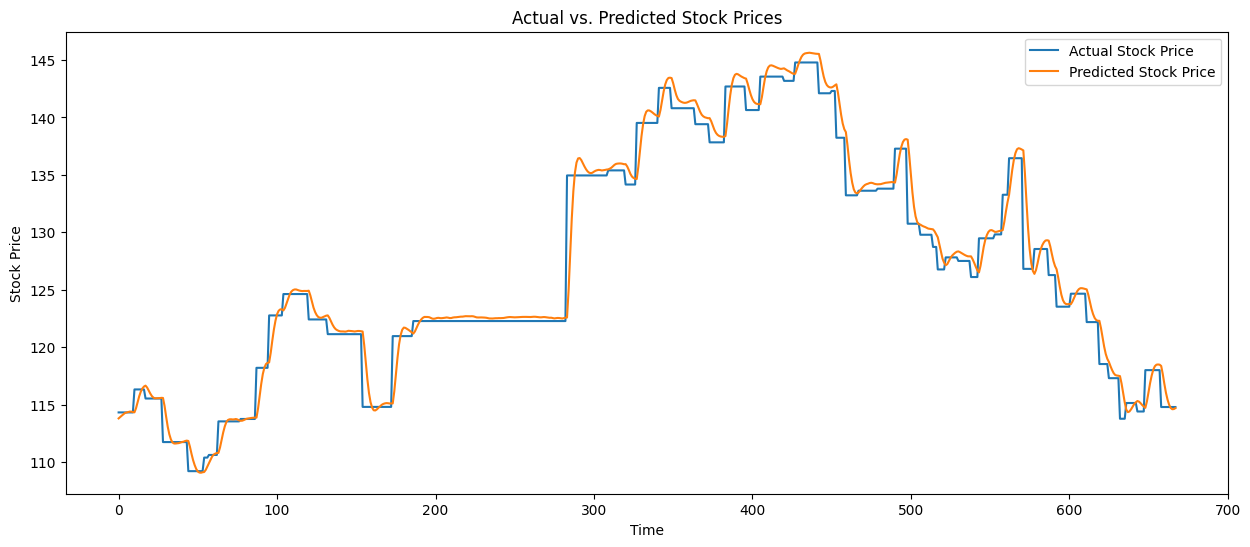

In [50]:
plt.figure(figsize=(15, 6))
plt.plot(y_test_full_scale, label='Actual Stock Price')
plt.plot(predictions_full_scale, label='Predicted Stock Price')
plt.title('Actual vs. Predicted Stock Prices')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()